# Heatmap of differentially expressed genes in an RNA-seq dataset

This notebook follows closely to [this online tutorial](https://training.galaxyproject.org/training-material/topics/transcriptomics/tutorials/rna-seq-viz-with-heatmap2/tutorial.html#create-heatmap-of-top-de-genes).  The datasets are available [here](https://zenodo.org/record/2529926#.YwaRPfHMIas) and should be downloaded into the ```data/heatmap``` directory (which you may have to create).


*Note:* this Jupyter notebook was converted to an R markdown file and then an html file using the following command in R :

```
rmarkdown::convert_ipynb('heatmap_r.ipynb')
rmarkdown::render('heatmap_r.Rmd')
```

___
*Author : Aaron M Geller, Aug. 2022*

In [ ]:
# Run this cell to create the data directory and download the sample data.
# On subsequent runs of this notebook, you can skip this step

directory = file.path(getwd(), 'data','heatmap')
dir.create(directory)

download.file('https://zenodo.org/record/2529926/files/heatmap_genes?download=1', 
    file.path(directory, 'heatmap_genes.txt'))
download.file('https://zenodo.org/record/2529926/files/limma-voom_luminalpregnant-luminallactate?download=1', 
    file.path(directory, 'limma-voom_luminalpregnant-luminallactate.tsv'))
download.file('https://zenodo.org/record/2529926/files/limma-voom_normalised_counts?download=1', 
    file.path(directory, 'limma-voom_normalised_counts.tsv'))

In [1]:
# import the necessary libraries
library(tidyr)
library(ggplot2)

## 1. Read in the DE results data using ```read.delim```.

In [2]:
DE_results <- read.delim('data/heatmap/limma-voom_luminalpregnant-luminallactate.tsv', sep='\t', header=TRUE)
head(DE_results)

,ENTREZID,SYMBOL,GENENAME,logFC,AveExpr,t,P.Value,adj.P.Val
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12992,Csn1s2b,casein alpha s2-like B,-8.603611,3.5629500,-43.79650,3.830650e-15,6.053959e-11
2,13358,Slc25a1,"solute carrier family 25 (mitochondrial carrier, citrate transporter), member 1",-4.124175,5.7796989,-29.90785,1.758595e-13,1.389642e-09
3,11941,Atp2b2,"ATPase, Ca++ transporting, plasma membrane 2",-7.386986,1.2821431,-27.81950,4.836363e-13,2.432800e-09
4,20531,Slc34a2,"solute carrier family 34 (sodium phosphate), member 2",-4.177812,4.2786290,-27.07272,6.157428e-13,2.432800e-09
5,100705,Acacb,acetyl-Coenzyme A carboxylase beta,-4.314320,4.4409137,-25.22357,1.499977e-12,4.741129e-09
6,13645,Egf,epidermal growth factor,-5.362664,0.7359047,-24.59930,2.116244e-12,5.574188e-09


## 2. Filter the results to only include the most significant genes.

### 2.1. Set a threshold for ```adj.P.Val < 0.01``` and ```abs(logFC) > 0.58```.

Note, these threshold values are simply taken from the [online tutorial](https://training.galaxyproject.org/training-material/topics/transcriptomics/tutorials/rna-seq-viz-with-heatmap2/tutorial.html#create-heatmap-of-top-de-genes) that we are following.  Your most appropriate threshold values may be different, depending on your research. 

In [3]:
df <- DE_results[which(DE_results['adj.P.Val'] < 0.01 & abs(DE_results['logFC']) > 0.58),]

### 2.2. Sort by ```P.Value``` (in ascending order).

In [4]:
df <- df[order(df$P.Value),]

### 2.3. Select the top 20 for the plot.

In [5]:
DE_results_sig <- head(df, 20)

DE_results_sig

,ENTREZID,SYMBOL,GENENAME,logFC,AveExpr,t,P.Value,adj.P.Val
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12992,Csn1s2b,casein alpha s2-like B,-8.603611,3.5629500,-43.79650,3.830650e-15,6.053959e-11
2,13358,Slc25a1,"solute carrier family 25 (mitochondrial carrier, citrate transporter), member 1",-4.124175,5.7796989,-29.90785,1.758595e-13,1.389642e-09
3,11941,Atp2b2,"ATPase, Ca++ transporting, plasma membrane 2",-7.386986,1.2821431,-27.81950,4.836363e-13,2.432800e-09
4,20531,Slc34a2,"solute carrier family 34 (sodium phosphate), member 2",-4.177812,4.2786290,-27.07272,6.157428e-13,2.432800e-09
5,100705,Acacb,acetyl-Coenzyme A carboxylase beta,-4.314320,4.4409137,-25.22357,1.499977e-12,4.741129e-09
6,13645,Egf,epidermal growth factor,-5.362664,0.7359047,-24.59930,2.116244e-12,5.574188e-09
7,230810,Slc30a2,"solute carrier family 30 (zinc transporter), member 2",-3.203118,2.6958115,-23.80428,3.024668e-12,6.828836e-09
8,68801,Elovl5,"ELOVL family member 5, elongation of long chain fatty acids (yeast)",-2.863304,6.4552045,-22.35358,6.598744e-12,1.303582e-08
9,19659,Rbp1,"retinol binding protein 1, cellular",5.443044,6.1070332,21.05236,1.479143e-11,2.364746e-08


## 3. Read in the normalized counts data using ```read.delim```.

In [6]:
normalized_counts = read.delim('data/heatmap/limma-voom_normalised_counts.tsv', sep='\t', header=TRUE)
head(normalized_counts)

,ENTREZID,SYMBOL,GENENAME,MCL1.DG,MCL1.DH,MCL1.DI,MCL1.DJ,MCL1.DK,MCL1.DL,MCL1.LA,MCL1.LB,MCL1.LC,MCL1.LD,MCL1.LE,MCL1.LF
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,497097,Xkr4,X-linked Kx blood group related 4,3.932532,3.507368,1.2723173,3.292541,3.9909851,3.724252,-5.8019424,-5.8887821,-5.4816421,-5.343143,-4.709206,-4.7226146
2,20671,Sox17,SRY (sex determining region Y)-box 17,1.890808,2.787899,1.6052165,2.121856,0.9642868,1.923156,-0.7575483,-0.2163568,-0.2721888,-1.255680,-1.901851,-0.3302972
3,27395,Mrpl15,mitochondrial ribosomal protein L15,3.429894,3.149591,3.6376380,3.631978,3.7037376,3.636318,4.3286281,3.9707527,4.4535229,4.016606,4.555237,4.6973455
4,18777,Lypla1,lysophospholipase 1,4.505933,4.285975,5.1283983,5.270351,5.3801014,5.185279,4.8889286,4.8635986,4.9031416,4.993363,5.379583,5.4610208
5,21399,Tcea1,transcription elongation factor A (SII) 1,5.804007,5.822559,5.9883448,5.764344,5.7006304,5.615502,5.5801412,5.4087074,5.5797290,5.512504,5.280898,5.2446116
6,58175,Rgs20,regulator of G-protein signaling 20,-2.673976,-3.401925,-0.9031247,-2.429318,-3.1567286,-3.121238,2.6116855,2.4819053,2.6321000,1.575720,1.072154,0.2315817


## 4. Match the normalized counts to our ```DE_results_sig``` dataframe.

We will use ```merge``` with the ```ENTREZID``` column.

In [7]:
DE_results_sig$id <- 1:nrow(DE_results_sig) # so that we can keep the same order (for the plot as well)
DE_results_sig_counts <- merge(DE_results_sig, normalized_counts, by = 'ENTREZID', suffixes = c('','_counts'), all.x = TRUE)
DE_results_sig_counts <- DE_results_sig_counts[order(DE_results_sig_counts$id), ]
DE_results_sig_counts

,ENTREZID,SYMBOL,GENENAME,logFC,AveExpr,t,P.Value,adj.P.Val,id,SYMBOL_counts,⋯,MCL1.DI,MCL1.DJ,MCL1.DK,MCL1.DL,MCL1.LA,MCL1.LB,MCL1.LC,MCL1.LD,MCL1.LE,MCL1.LF
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,12992,Csn1s2b,casein alpha s2-like B,-8.603611,3.5629500,-43.79650,3.830650e-15,6.053959e-11,1,Csn1s2b,⋯,-0.3348410,0.01546680,6.00061829,5.80535430,1.66566313,1.07700219,3.8014462,4.5194940,12.763715,12.742450
4,13358,Slc25a1,"solute carrier family 25 (mitochondrial carrier, citrate transporter), member 1",-4.124175,5.7796989,-29.90785,1.758595e-13,1.389642e-09,2,Slc25a1,⋯,4.4075664,4.36509782,4.98384553,5.11621078,5.01103705,4.86860791,5.7026134,5.7476307,9.713845,9.984259
1,11941,Atp2b2,"ATPase, Ca++ transporting, plasma membrane 2",-7.386986,1.2821431,-27.81950,4.836363e-13,2.432800e-09,3,Atp2b2,⋯,-2.3016741,-2.13981143,1.79746766,1.15674653,-1.55401491,-1.13389459,1.5070425,2.1080678,8.998261,9.368077
11,20531,Slc34a2,"solute carrier family 34 (sodium phosphate), member 2",-4.177812,4.2786290,-27.07272,6.157428e-13,2.432800e-09,4,Slc34a2,⋯,2.3630156,1.96299938,2.94340803,3.21861179,3.26683586,3.61702946,6.3681539,6.2460397,10.337535,10.633115
18,100705,Acacb,acetyl-Coenzyme A carboxylase beta,-4.314320,4.4409137,-25.22357,1.499977e-12,4.741129e-09,5,Acacb,⋯,3.0686170,3.17883408,3.54093399,3.84454607,2.74880436,3.26856484,4.6719099,4.7269776,8.906309,9.119834
5,13645,Egf,epidermal growth factor,-5.362664,0.7359047,-24.59930,2.116244e-12,5.574188e-09,6,Egf,⋯,-1.2375437,-1.35131553,0.24926371,0.17154354,-0.94396143,-0.75949908,0.7851444,1.1960155,6.348109,6.342802
20,230810,Slc30a2,"solute carrier family 30 (zinc transporter), member 2",-3.203118,2.6958115,-23.80428,3.024668e-12,6.828836e-09,7,Slc30a2,⋯,0.9253948,0.28340000,0.86119326,0.78565238,1.66566313,1.33038642,4.4146903,4.4913277,7.657390,7.652696
15,68801,Elovl5,"ELOVL family member 5, elongation of long chain fatty acids (yeast)",-2.863304,6.4552045,-22.35358,6.598744e-12,1.303582e-08,8,Elovl5,⋯,6.0124456,5.81173822,6.33392170,6.34432819,5.29543135,5.25012962,6.1982777,6.4427178,9.146733,9.219442
8,19659,Rbp1,"retinol binding protein 1, cellular",5.443044,6.1070332,21.05236,1.479143e-11,2.364746e-08,9,Rbp1,⋯,7.0241424,6.90830386,5.96894312,5.98047489,6.06880758,6.21352172,7.7209409,7.5548912,2.639522,1.753119


## 5. Create a heatmap using ```ggplot2```.

The y-axis will show the ```SYMBOL``` values.  The x-axis will show the ```MCL.*``` column names.  The colors will be defined by the respective ```MCL.*``` values.  

### 5.1. Select only the columns that we want to show in the plot.

In [8]:
# create a mask that has values of True for the columns that have names with 'SYMBOL' and 'MCL1.''
mask <- grepl('MCL1.|SYMBOL', names(DE_results_sig_counts))

# remove the 'SYMBOL_counts' column (from the normalized counts file). 
# Note: this is only necessary here because the 'SYMBOL' column exists in both data files 
#   (and I renamed the 'SYMBOL' column in the normalized counts file to be 'SYMBOL_counts' during the merge.) 
mask <- mask & !grepl('SYMBOL_counts', names(DE_results_sig_counts))

# apply the mask
df <- DE_results_sig_counts[, mask]
df

,SYMBOL,MCL1.DG,MCL1.DH,MCL1.DI,MCL1.DJ,MCL1.DK,MCL1.DL,MCL1.LA,MCL1.LB,MCL1.LC,MCL1.LD,MCL1.LE,MCL1.LF
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,Csn1s2b,-3.0365466,-2.2644216,-0.3348410,0.01546680,6.00061829,5.80535430,1.66566313,1.07700219,3.8014462,4.5194940,12.763715,12.742450
4,Slc25a1,4.8814648,4.5742093,4.4075664,4.36509782,4.98384553,5.11621078,5.01103705,4.86860791,5.7026134,5.7476307,9.713845,9.984259
1,Atp2b2,-1.4515841,-0.9689657,-2.3016741,-2.13981143,1.79746766,1.15674653,-1.55401491,-1.13389459,1.5070425,2.1080678,8.998261,9.368077
11,Slc34a2,-0.2291917,0.6159968,2.3630156,1.96299938,2.94340803,3.21861179,3.26683586,3.61702946,6.3681539,6.2460397,10.337535,10.633115
18,Acacb,2.8600021,3.3556315,3.0686170,3.17883408,3.54093399,3.84454607,2.74880436,3.26856484,4.6719099,4.7269776,8.906309,9.119834
5,Egf,-0.8897052,-1.0799971,-1.2375437,-1.35131553,0.24926371,0.17154354,-0.94396143,-0.75949908,0.7851444,1.1960155,6.348109,6.342802
20,Slc30a2,0.9505144,1.3314292,0.9253948,0.28340000,0.86119326,0.78565238,1.66566313,1.33038642,4.4146903,4.4913277,7.657390,7.652696
15,Elovl5,5.7054019,5.7018872,6.0124456,5.81173822,6.33392170,6.34432819,5.29543135,5.25012962,6.1982777,6.4427178,9.146733,9.219442
8,Rbp1,7.7201289,7.7316024,7.0241424,6.90830386,5.96894312,5.98047489,6.06880758,6.21352172,7.7209409,7.5548912,2.639522,1.753119


### 5.2. (Optional) Set the rownames of the dataframe to be the ```SYMBOL``` names.

This is only required if you plan to rescale the data (see the following cells)

In [9]:
row.names(df) <- df$SYMBOL
df <- subset(df, select = -c(SYMBOL) ) # remove the SYMBOL column so that it isn't repeated
df

,MCL1.DG,MCL1.DH,MCL1.DI,MCL1.DJ,MCL1.DK,MCL1.DL,MCL1.LA,MCL1.LB,MCL1.LC,MCL1.LD,MCL1.LE,MCL1.LF
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Csn1s2b,-3.0365466,-2.2644216,-0.3348410,0.01546680,6.00061829,5.80535430,1.66566313,1.07700219,3.8014462,4.5194940,12.763715,12.742450
Slc25a1,4.8814648,4.5742093,4.4075664,4.36509782,4.98384553,5.11621078,5.01103705,4.86860791,5.7026134,5.7476307,9.713845,9.984259
Atp2b2,-1.4515841,-0.9689657,-2.3016741,-2.13981143,1.79746766,1.15674653,-1.55401491,-1.13389459,1.5070425,2.1080678,8.998261,9.368077
Slc34a2,-0.2291917,0.6159968,2.3630156,1.96299938,2.94340803,3.21861179,3.26683586,3.61702946,6.3681539,6.2460397,10.337535,10.633115
Acacb,2.8600021,3.3556315,3.0686170,3.17883408,3.54093399,3.84454607,2.74880436,3.26856484,4.6719099,4.7269776,8.906309,9.119834
Egf,-0.8897052,-1.0799971,-1.2375437,-1.35131553,0.24926371,0.17154354,-0.94396143,-0.75949908,0.7851444,1.1960155,6.348109,6.342802
Slc30a2,0.9505144,1.3314292,0.9253948,0.28340000,0.86119326,0.78565238,1.66566313,1.33038642,4.4146903,4.4913277,7.657390,7.652696
Elovl5,5.7054019,5.7018872,6.0124456,5.81173822,6.33392170,6.34432819,5.29543135,5.25012962,6.1982777,6.4427178,9.146733,9.219442
Rbp1,7.7201289,7.7316024,7.0241424,6.90830386,5.96894312,5.98047489,6.06880758,6.21352172,7.7209409,7.5548912,2.639522,1.753119


### 5.3. (Optional) scale each row to go from -1 to 1.

Note that this rescaling is done here to makes it easier to visually identify which cell-types show the same pattern of up or down regulation for specific sets of genes (regardless of the magnitude of change across genes).  This step may not be necessary for all data sets.  In particular, if it is important to compare the magnitudes of the change between different genes, this rescaling should be skipped.

In [10]:
library(data.table)

In [11]:
# this will be easier if we transpose the dataframe first

# transpose data frame
tmp <- transpose(df)

# redefine row and column names
rownames(tmp) <- colnames(df)
colnames(tmp) <- rownames(df)

# rescale each column 
for(i in 1:ncol(tmp)) {
    c <- colnames(tmp)[i]
    data <- tmp[c]
    norm <- 2.*(data - min(data))/(max(data) - min(data)) - 1
    tmp[c] <- norm
}

df <- transpose(tmp)
# redefine row and column names
rownames(df) <- colnames(tmp)
colnames(df) <- rownames(tmp)
df


,MCL1.DG,MCL1.DH,MCL1.DI,MCL1.DJ,MCL1.DK,MCL1.DL,MCL1.LA,MCL1.LB,MCL1.LC,MCL1.LD,MCL1.LE,MCL1.LF
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Csn1s2b,-1.0000000,-0.90226428,-0.65801761,-0.613675593,0.143925968,0.1192094,-0.40479344,-0.47930625,-0.13444563,-0.04355501,1.0000000,0.9973082
Slc25a1,-0.8162121,-0.92557199,-0.98488437,-1.000000000,-0.779772217,-0.7326601,-0.77009408,-0.82078817,-0.52394478,-0.50792196,0.9037527,1.0000000
Atp2b2,-0.8543088,-0.77159609,-1.00000000,-0.972259449,-0.297475702,-0.4072846,-0.87186373,-0.79986214,-0.34724971,-0.24424404,0.9366198,1.0000000
Slc34a2,-1.0000000,-0.84438141,-0.52271514,-0.596367308,-0.415851571,-0.3651802,-0.35630108,-0.29182240,0.21472276,0.19223872,0.9455769,1.0000000
Acacb,-0.9650927,-0.80950420,-0.89960409,-0.865004639,-0.751333873,-0.6560237,-1.00000000,-0.83683627,-0.39629678,-0.37900986,0.9329700,1.0000000
Egf,-0.8800923,-0.92952240,-0.97044668,-1.000000000,-0.584234070,-0.6044226,-0.89418583,-0.84626996,-0.44503388,-0.33830614,1.0000000,0.9986213
Slc30a2,-0.8190628,-0.71574976,-0.82587586,-1.000000000,-0.843288836,-0.8637773,-0.62509763,-0.71603258,0.12050339,0.14128928,1.0000000,0.9987270
Elovl5,-0.7706040,-0.77237488,-0.61589514,-0.717024715,-0.453914392,-0.4486709,-0.97717402,-1.00000000,-0.52226073,-0.39909578,0.9633648,1.0000000
Rbp1,0.9961617,1.00000000,0.76333129,0.724579472,0.410332315,0.4141901,0.44374027,0.49215193,0.99643336,0.94088426,-0.7034687,-1.0000000


In [12]:
# prepare data for ggplot
df$SYMBOL <- rownames(df) # add back the SYMBOL column (but only if you removed it above during rescaling)
df_long <- pivot_longer(
    data = df,
    cols = -c(SYMBOL),
    names_to = "measurement",
    values_to = "value"
)

df_long$SYMBOL <- factor(df_long$SYMBOL, levels = unique(as.character(df_long$SYMBOL)))
head(df_long)


SYMBOL,measurement,value
<fct>,<chr>,<dbl>
Csn1s2b,MCL1.DG,-1.0000000
Csn1s2b,MCL1.DH,-0.9022643
Csn1s2b,MCL1.DI,-0.6580176
Csn1s2b,MCL1.DJ,-0.6136756
Csn1s2b,MCL1.DK,0.1439260
Csn1s2b,MCL1.DL,0.1192094


# TRYING TO KEEP THE SAME ORDER

In [13]:
unique(as.character(df_long$SYMBOL))

[1] "Csn1s2b"  "Slc25a1"  "Atp2b2"   "Slc34a2"  "Acacb"    "Egf"     
 [7] "Slc30a2"  "Elovl5"   "Rbp1"     "Ceacam10" "Ddah1"    "Cidea"   
[13] "Pmvk"     "St6gal1"  "Ppl"      "Elovl6"   "Ggt1"     "Slc39a8" 
[19] "Slc39a4"  "Scd1"

### 5.X. Use ```ggplot```'s heatmap function.

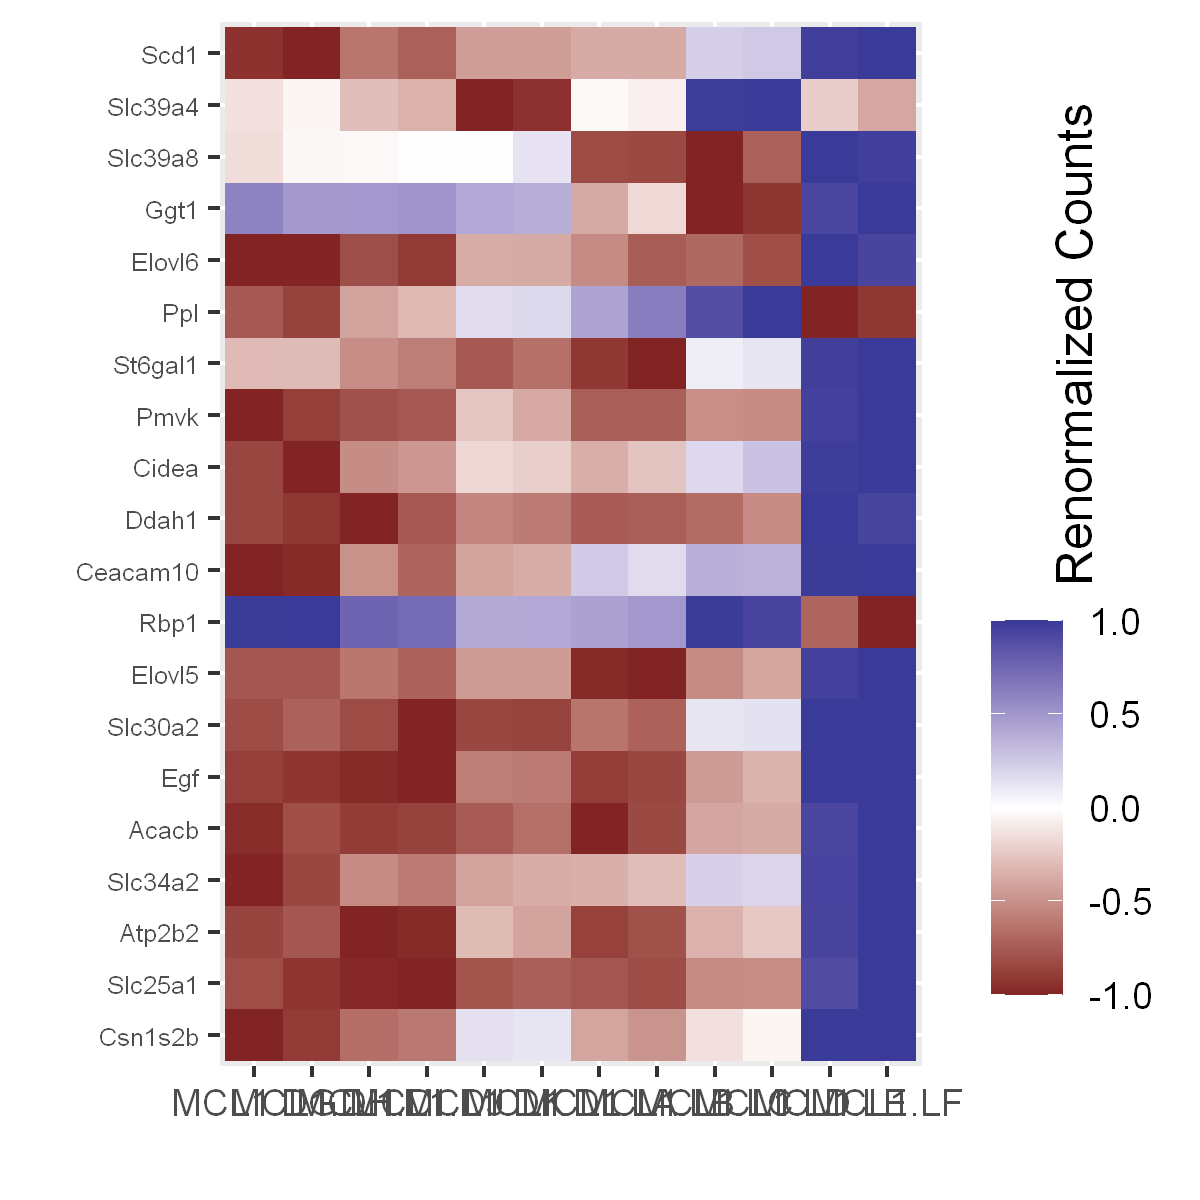

In [14]:
options(jupyter.plot_mimetypes = "image/png", repr.plot.width = 4, repr.plot.height = 4, repr.plot.res = 300)

heatmap_plot <- ggplot(data = df_long, aes(x = measurement, y = SYMBOL)) +
    geom_tile(aes(fill = value)) +
    scale_fill_gradient2(limits = c(-1,1), name = 'Renormalized Counts') +
    guides(
        size = "none",
        color = guide_colorbar(title.position = "right")
    ) +
    theme(axis.text.y = element_text(size = 6), 
        legend.key.height = unit(0.25, "in"),
        legend.title = element_text(size = 12, angle = 90),
        legend.title.align = 0.5,
        legend.direction = "vertical"
    ) +
    labs(x = '', y = '') 

heatmap_plot

## Relevant documentation links: 